In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#from matplotlib_venn import venn2
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
from pandas.api.types import CategoricalDtype
import os

from uri_template import expand
import darts
sns.set_palette('Paired')

In [139]:
credit_data=pd.read_csv('creditcard.csv')

In [140]:
credit_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

## EDA

<Axes: xlabel='Class', ylabel='Amount'>

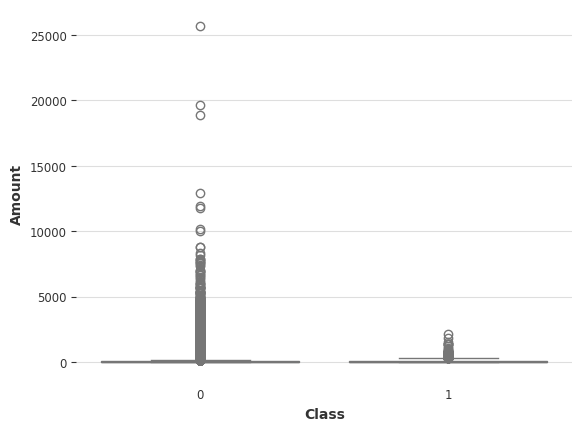

In [4]:
sns.boxplot(credit_data,x='Class',y='Amount')

In [5]:
credit_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


<Axes: >

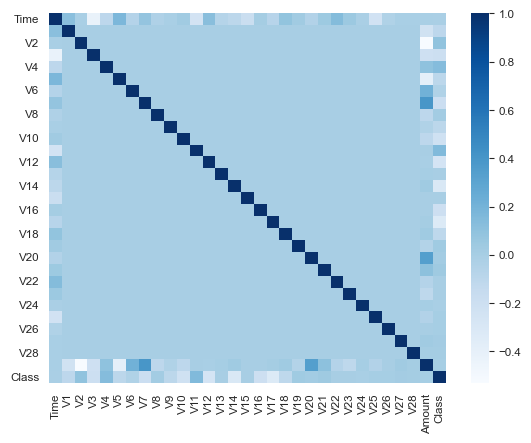

In [141]:
correl=credit_data.corr()
sns.heatmap(correl, cmap='Blues')

In [7]:
credit_data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [8]:
# Scatter and density plots
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    #df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()


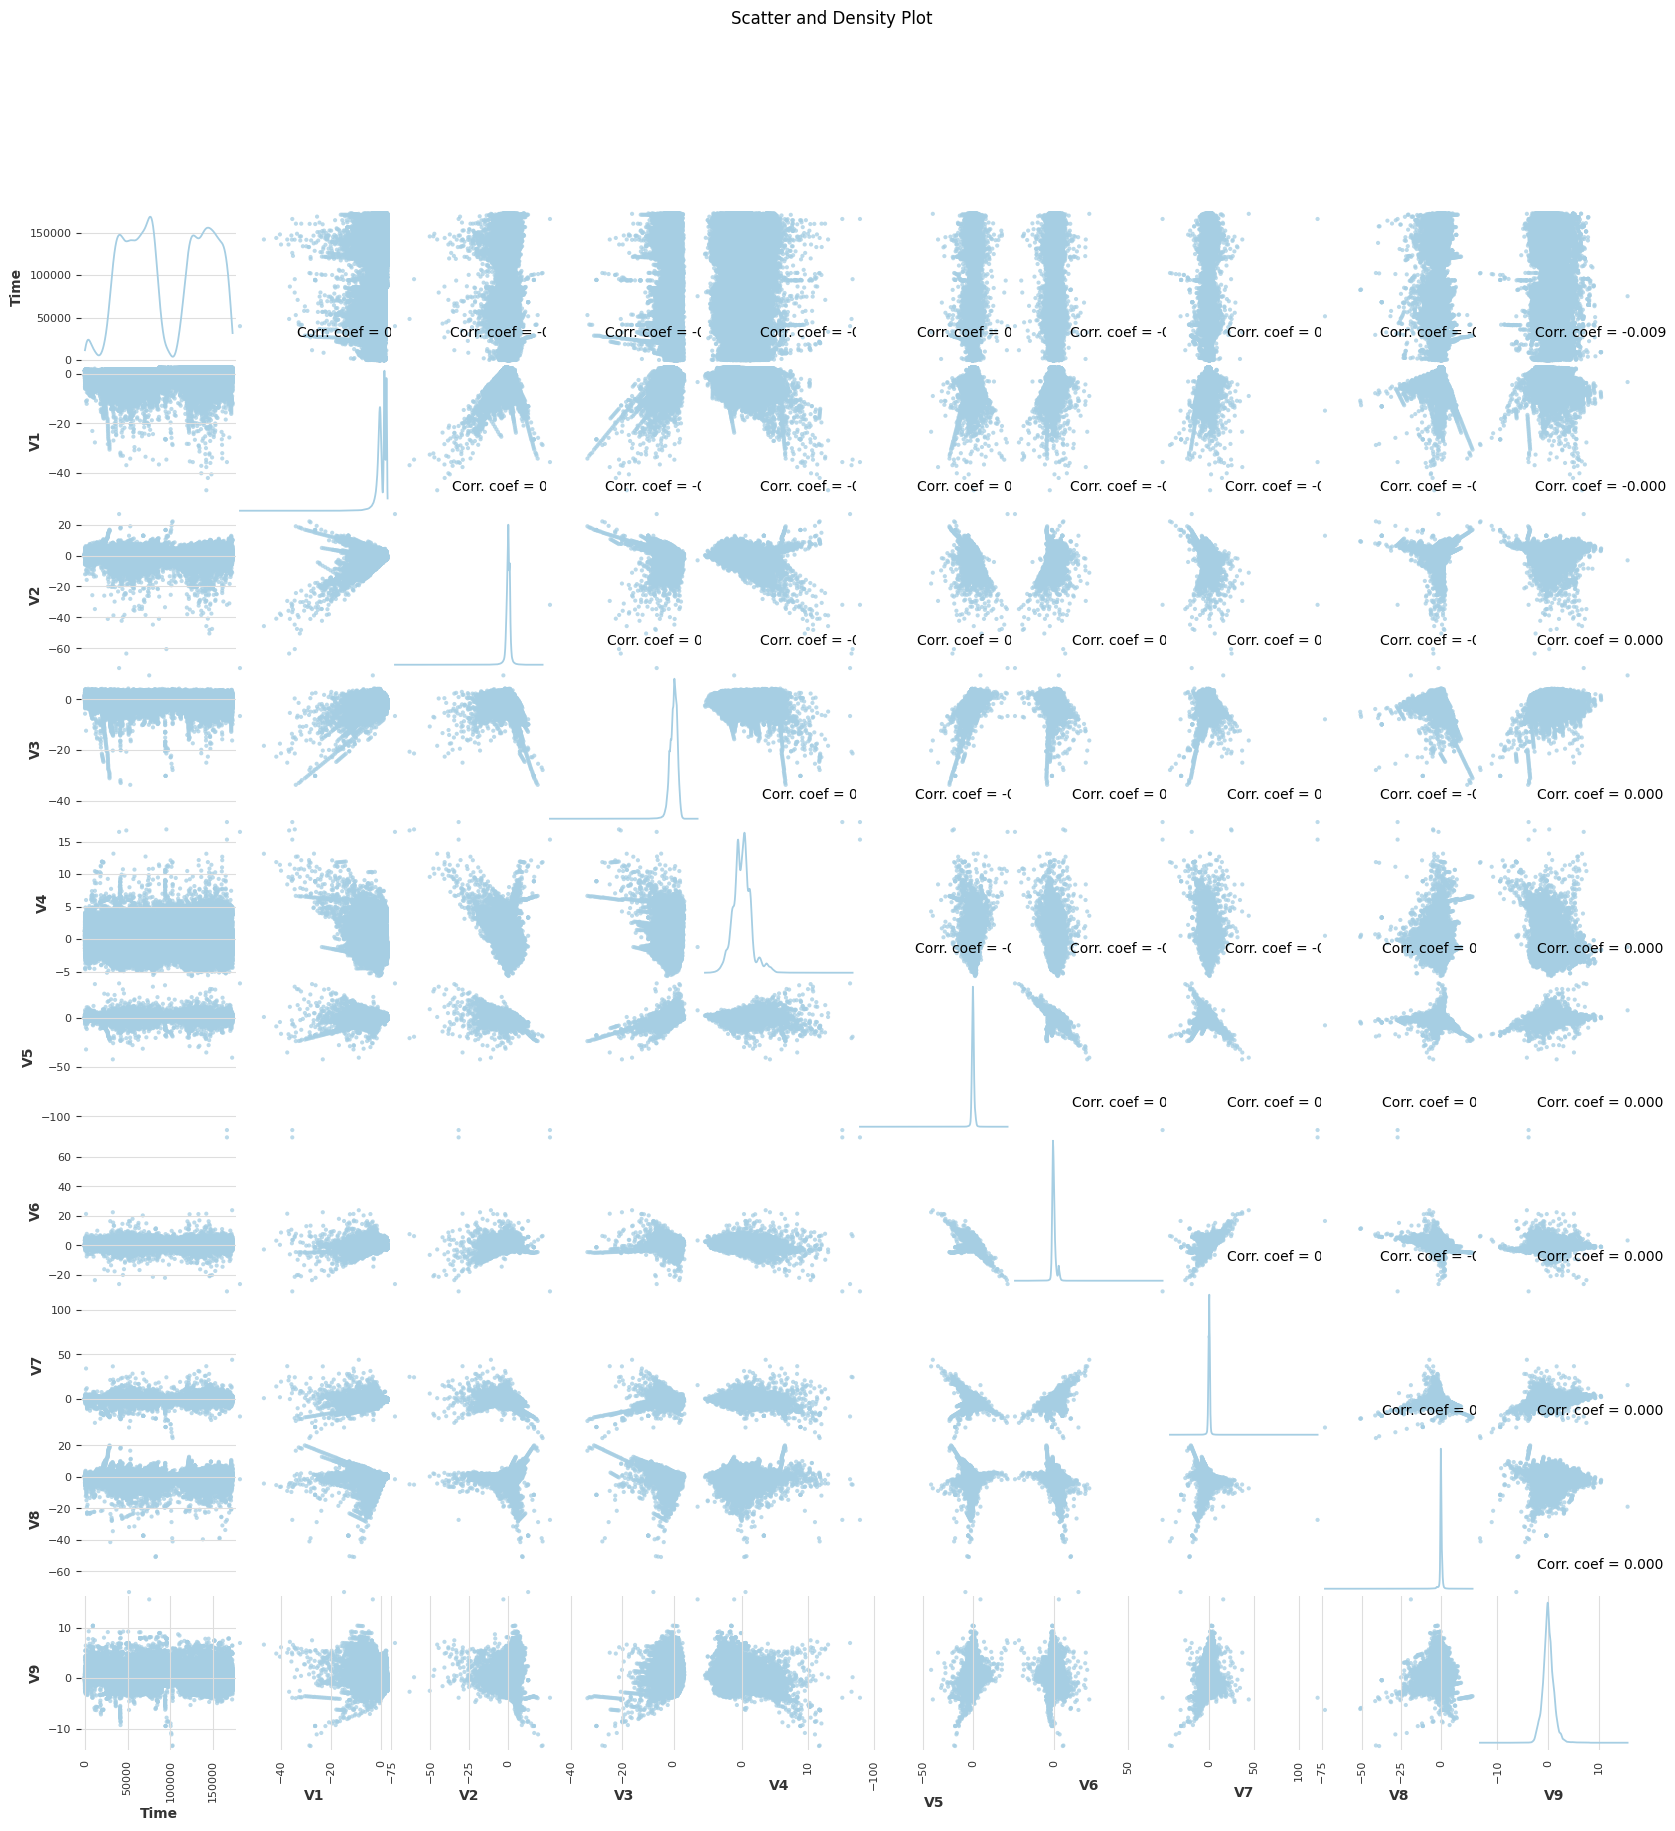

In [9]:
plotScatterMatrix(credit_data, 20,10)

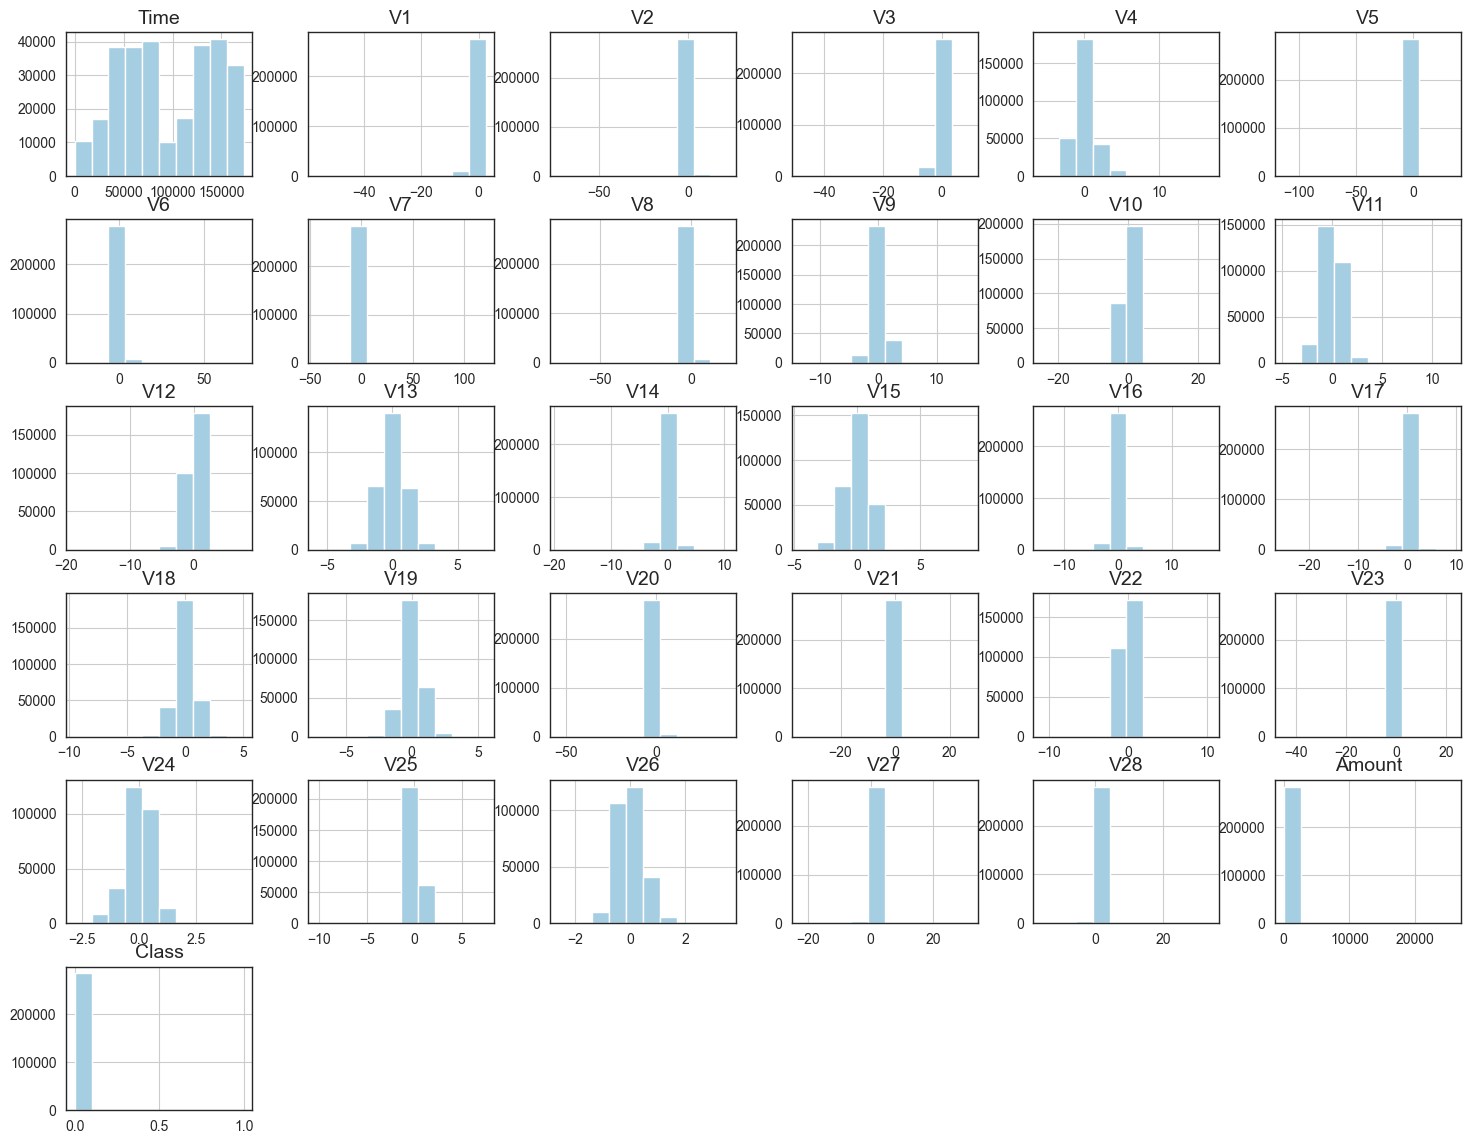

In [63]:
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

credit_data.hist(figsize=(18, 14))
plt.show()

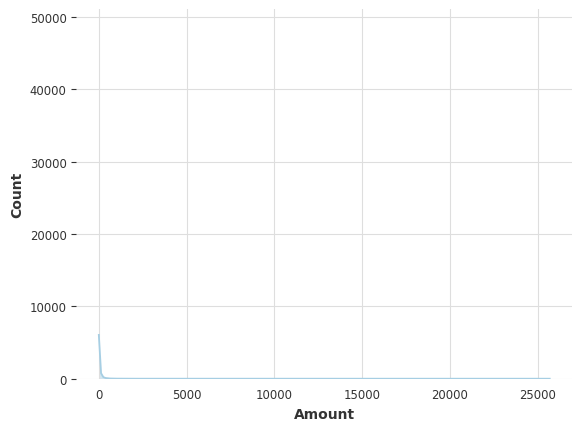

In [10]:
sns.histplot(credit_data,x='Amount',kde=True)
plt.show()

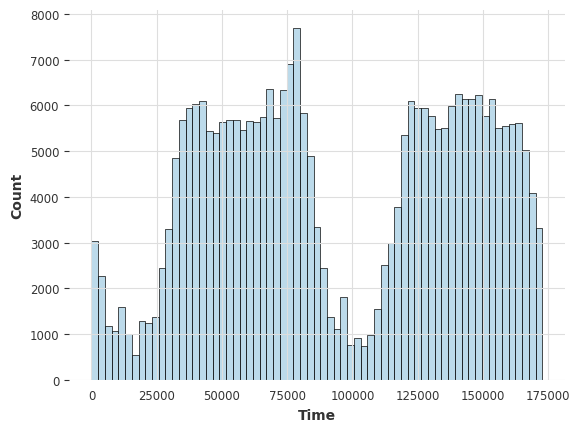

In [11]:
sns.histplot(credit_data,x='Time')
plt.show()

<Axes: xlabel='Class', ylabel='Time'>

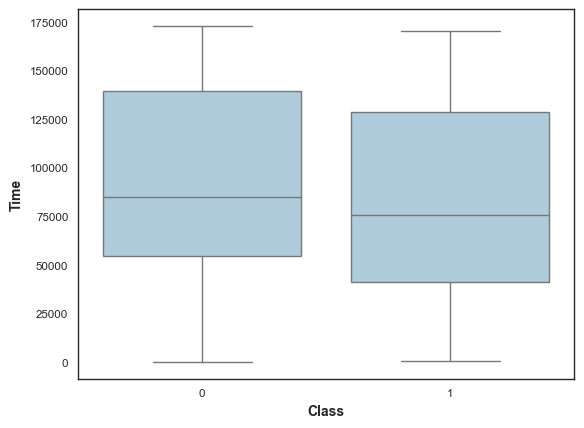

In [147]:
sns.boxplot(credit_data,x='Class',y='Time')

In [12]:
credit_data['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

In [13]:
fraud=credit_data[credit_data['Class']==1]
legit=credit_data[credit_data['Class']==0]

In [14]:
legit.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,...,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.0
mean,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022,0.0
std,47484.015786,1.929814,1.636146,1.459429,1.399333,1.356952,1.329913,1.178812,1.161283,1.089372,...,0.716743,0.723668,0.621541,0.605776,0.520673,0.482241,0.399847,0.329570,250.105092,0.0
min,0.000000,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-31.764946,-73.216718,-6.290730,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,0.000000,0.0
25%,54230.000000,-0.917544,-0.599473,-0.884541,-0.850077,-0.689398,-0.766847,-0.551442,-0.208633,-0.640412,...,-0.228509,-0.542403,-0.161702,-0.354425,-0.317145,-0.327074,-0.070852,-0.052950,5.650000,0.0
50%,84711.000000,0.020023,0.064070,0.182158,-0.022405,-0.053457,-0.273123,0.041138,0.022041,-0.049964,...,-0.029821,0.006736,-0.011147,0.041082,0.016417,-0.052227,0.001230,0.011199,22.000000,0.0
75%,139333.000000,1.316218,0.800446,1.028372,0.737624,0.612181,0.399619,0.571019,0.326200,0.598230,...,0.185626,0.528407,0.147522,0.439869,0.350594,0.240671,0.090573,0.077962,77.050000,0.0
max,172792.000000,2.454930,18.902453,9.382558,16.875344,34.801666,73.301626,120.589494,18.709255,15.594995,...,22.614889,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,25691.160000,0.0


In [15]:
fraud.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,...,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.0
mean,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321,1.0
std,47835.365138,6.783687,4.291216,7.110937,2.873318,5.372468,1.858124,7.206773,6.797831,2.500896,...,3.869304,1.494602,1.579642,0.515577,0.797205,0.471679,1.376766,0.547291,256.683288,0.0
min,406.000000,-30.552380,-8.402154,-31.103685,-1.313275,-22.105532,-6.406267,-43.557242,-41.044261,-13.434066,...,-22.797604,-8.887017,-19.254328,-2.028024,-4.781606,-1.152671,-7.263482,-1.869290,0.000000,1.0
25%,41241.500000,-6.036063,1.188226,-8.643489,2.373050,-4.792835,-2.501511,-7.965295,-0.195336,-3.872383,...,0.041787,-0.533764,-0.342175,-0.436809,-0.314348,-0.259416,-0.020025,-0.108868,1.000000,1.0
50%,75568.500000,-2.342497,2.717869,-5.075257,4.177147,-1.522962,-1.424616,-3.034402,0.621508,-2.208768,...,0.592146,0.048434,-0.073135,-0.060795,0.088371,0.004321,0.394926,0.146344,9.250000,1.0
75%,128483.000000,-0.419200,4.971257,-2.276185,6.348729,0.214562,-0.413216,-0.945954,1.764879,-0.787850,...,1.244611,0.617474,0.308378,0.285328,0.456515,0.396733,0.826029,0.381152,105.890000,1.0
max,170348.000000,2.132386,22.057729,2.250210,12.114672,11.095089,6.474115,5.802537,20.007208,3.353525,...,27.202839,8.361985,5.466230,1.091435,2.208209,2.745261,3.052358,1.779364,2125.870000,1.0


- We see that the means of features differ significantly between fraud and legit data. 
- Specifically, for legit data, the means are mostly around 0, but is high negative or positive value for fraud data

## Feature Engineering

<Axes: ylabel='Frequency'>

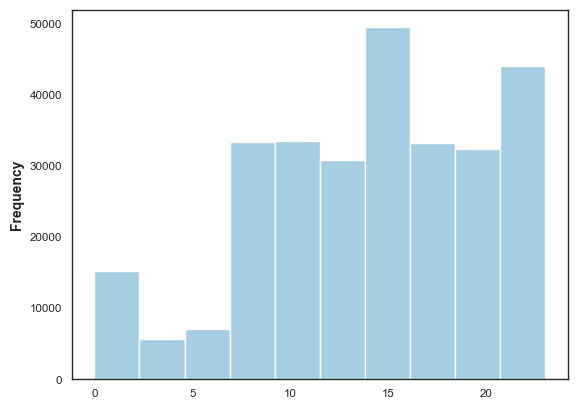

In [149]:
#creating new column
credit_data['Hour'] = (credit_data['Time'] // 3600) % 24
credit_data['Hour'].plot.hist()

In [150]:
print(credit_data['Hour'].describe())
print(sorted(credit_data['Hour'].unique()))

count    284807.000000
mean         14.046470
std           5.835854
min           0.000000
25%          10.000000
50%          15.000000
75%          19.000000
max          23.000000
Name: Hour, dtype: float64
[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0]


In [151]:
# 2. Define hour bins and labels
hour_bins = list(range(0, 25, 2))  # [0, 2, 4, ..., 24]
hour_labels = [f"{i:02d}-{i+2:02d}" for i in hour_bins[:-1]]

# 3. Create hourly bins from hour-of-day
credit_data['HourBin'] = pd.cut(
    credit_data['Hour'],
    bins=hour_bins,
    labels=hour_labels,
    right=False,
    include_lowest=True
)

In [152]:
non_fraud_bin_counts = (
    credit_data[credit_data['Class'] == 0]['HourBin']
    .value_counts()
    .sort_index()
    .reset_index()
)
non_fraud_bin_counts.columns = ['Hour', 'Non_Fraud_Count']
print(non_fraud_bin_counts)

     Hour  Non_Fraud_Count
0   00-02            11899
1   02-04             6746
2   04-06             5165
3   06-08            11312
4   08-10            26089
5   10-12            33393
6   12-14            30751
7   14-16            32982
8   16-18            32568
9   18-20            32636
10  20-22            34425
11  22-24            26349


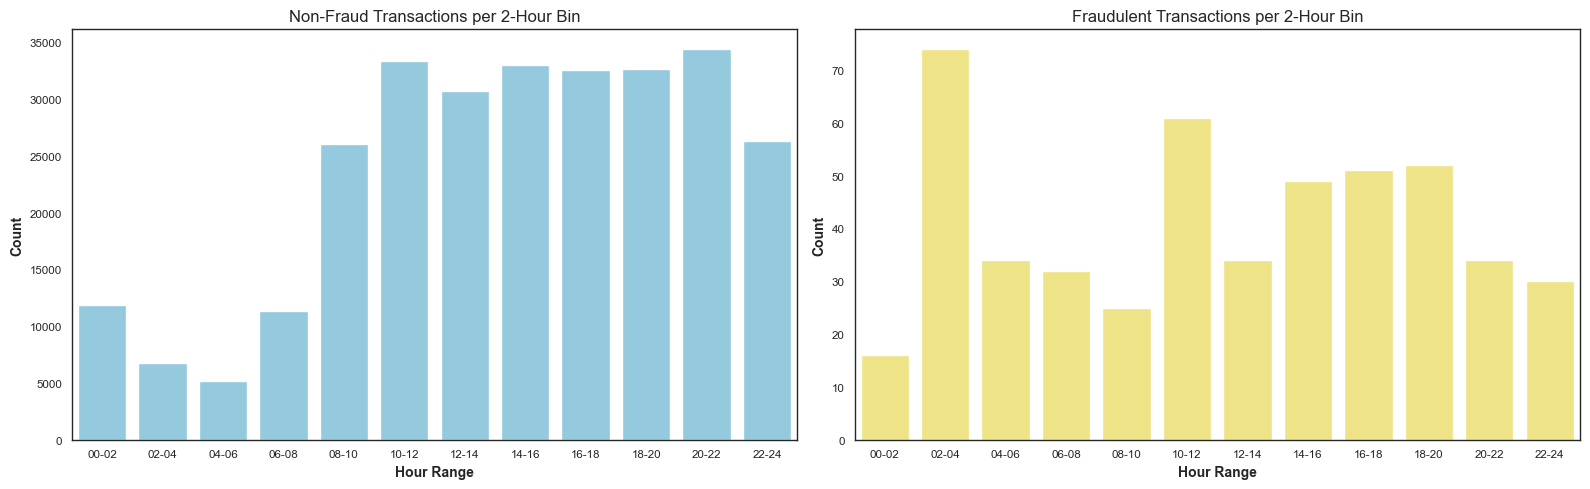

In [153]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 2, figsize=(16, 5))

sns.countplot(data=credit_data[credit_data['Class'] == 0], x='HourBin', ax=axs[0], color='skyblue')
axs[0].set_title("Non-Fraud Transactions per 2-Hour Bin")
axs[0].set_xlabel("Hour Range")
axs[0].set_ylabel("Count")

sns.countplot(data=credit_data[credit_data['Class'] == 1], x='HourBin', ax=axs[1], color='#fff176')
axs[1].set_title("Fraudulent Transactions per 2-Hour Bin")
axs[1].set_xlabel("Hour Range")
axs[1].set_ylabel("Count")

plt.tight_layout()
plt.show()


In [154]:
fraud=credit_data[credit_data['Class']==1]
legit=credit_data[credit_data['Class']==0]

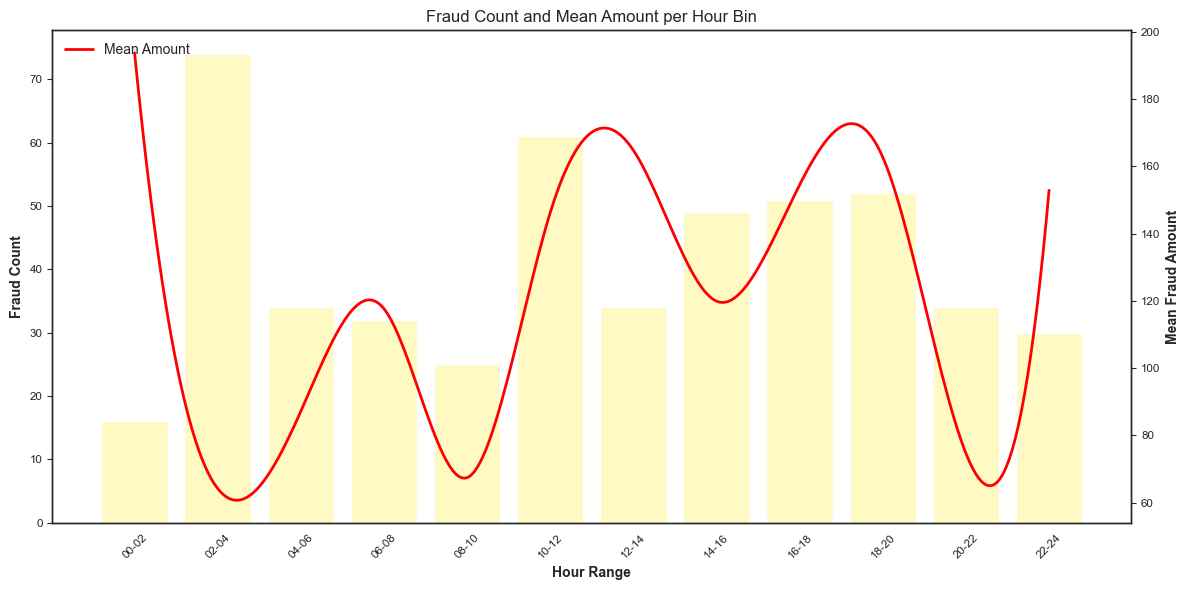

In [155]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.interpolate import make_interp_spline

# Step 3: Aggregate fraud counts and mean amounts
fraud_summary = fraud.groupby('HourBin')['Amount'].agg(['count', 'mean']).reset_index()
fraud_summary.columns = ['HourBin', 'Fraud_Count', 'Fraud_Mean']

# Step 4: Prepare smoothing for line chart
x = np.arange(len(fraud_summary))
x_smooth = np.linspace(x.min(), x.max(), 300)
spline = make_interp_spline(x, fraud_summary['Fraud_Mean'], k=3)
y_smooth = spline(x_smooth)

# Step 5: Plot
fig, ax1 = plt.subplots(figsize=(12, 6))

# Bar chart for counts
ax1.bar(fraud_summary['HourBin'], fraud_summary['Fraud_Count'], color='#fff9c4')
ax1.set_ylabel('Fraud Count')
ax1.set_xlabel('Hour Range')
ax1.set_title('Fraud Count and Mean Amount per Hour Bin')
ax1.tick_params(axis='x', rotation=45)

# Line chart for mean amount (secondary Y-axis optional)
ax2 = ax1.twinx()
ax2.plot(x_smooth, y_smooth, color='red', linewidth=2, label='Mean Amount')
ax2.set_ylabel('Mean Fraud Amount')

# Optional: add legend from ax2
ax2.legend(loc='upper left')

plt.tight_layout()
plt.show()

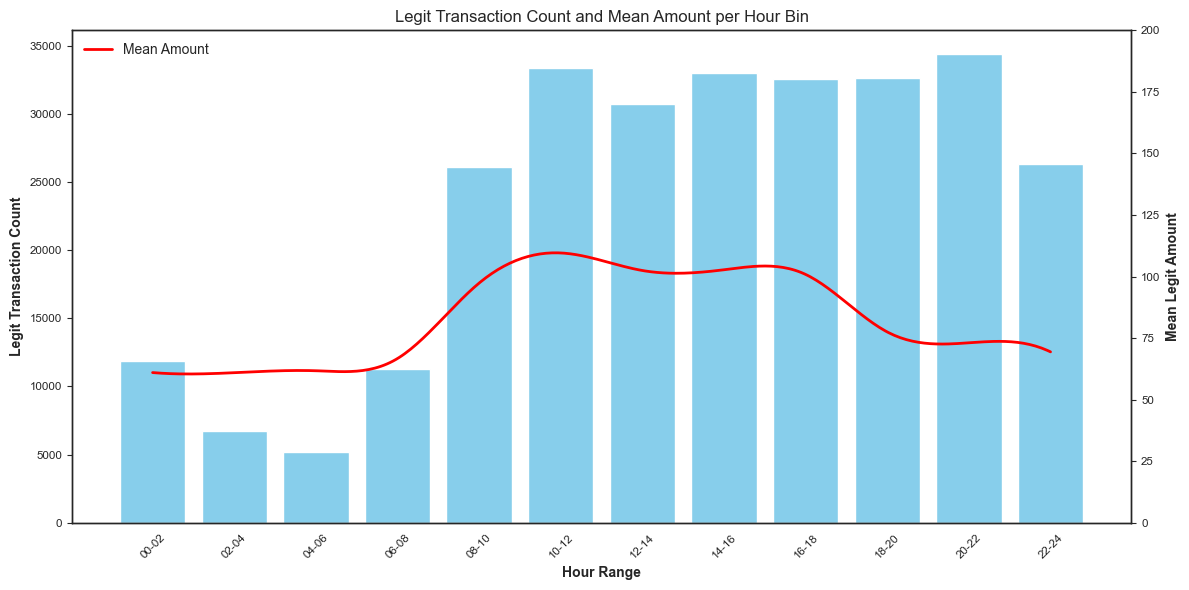

In [156]:
# Step 3: Aggregate legit counts and mean amounts
legit_summary = legit.groupby('HourBin')['Amount'].agg(['count', 'mean']).reset_index()
legit_summary.columns = ['HourBin', 'Legit_Count', 'Legit_Mean']

# Step 4: Smooth mean amount for line chart
x = np.arange(len(legit_summary))
x_smooth = np.linspace(x.min(), x.max(), 300)
spline = make_interp_spline(x, legit_summary['Legit_Mean'], k=3)
y_smooth = spline(x_smooth)

# Step 5: Plot
fig, ax1 = plt.subplots(figsize=(12, 6))

# Bar chart (left y-axis)
ax1.bar(legit_summary['HourBin'], legit_summary['Legit_Count'], color='skyblue')
ax1.set_ylabel('Legit Transaction Count')
ax1.set_xlabel('Hour Range')
ax1.set_title('Legit Transaction Count and Mean Amount per Hour Bin')
ax1.tick_params(axis='x', rotation=45)

# Line chart (right y-axis)
ax2 = ax1.twinx()
ax2.plot(x_smooth, y_smooth, color='red', linewidth=2, label='Mean Amount')
ax2.set_ylabel('Mean Legit Amount')
ax2.set_ylim(0, 200)

# Optional: Add legend
ax2.legend(loc='upper left')

plt.tight_layout()
plt.show()

## Feature Selection

In [4]:
X_pca=credit_data.drop(['Time','Amount','Class'],axis=1)
explained_variance = np.var(X_pca, axis=0,ddof=1)


In [7]:
total_var=np.sum(explained_variance)
print('Total variance: ', total_var)

Total variance:  30.73184803514371


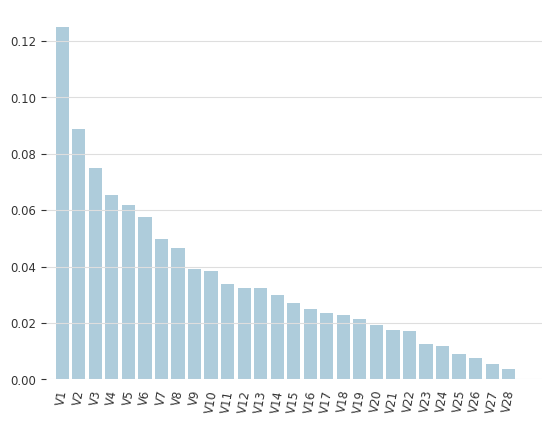

In [8]:
explained_variance_ratio = explained_variance / total_var
ax=sns.barplot(explained_variance_ratio,width=0.8)
ax.set_xlim(-1, len(explained_variance) + 1)
plt.xticks(rotation=80)
plt.show()

In [9]:
cumulative_variance = np.cumsum(explained_variance_ratio)
n_components = np.argmax(cumulative_variance >= 0.95) + 1  # Keep 95% variance
print(n_components)

22


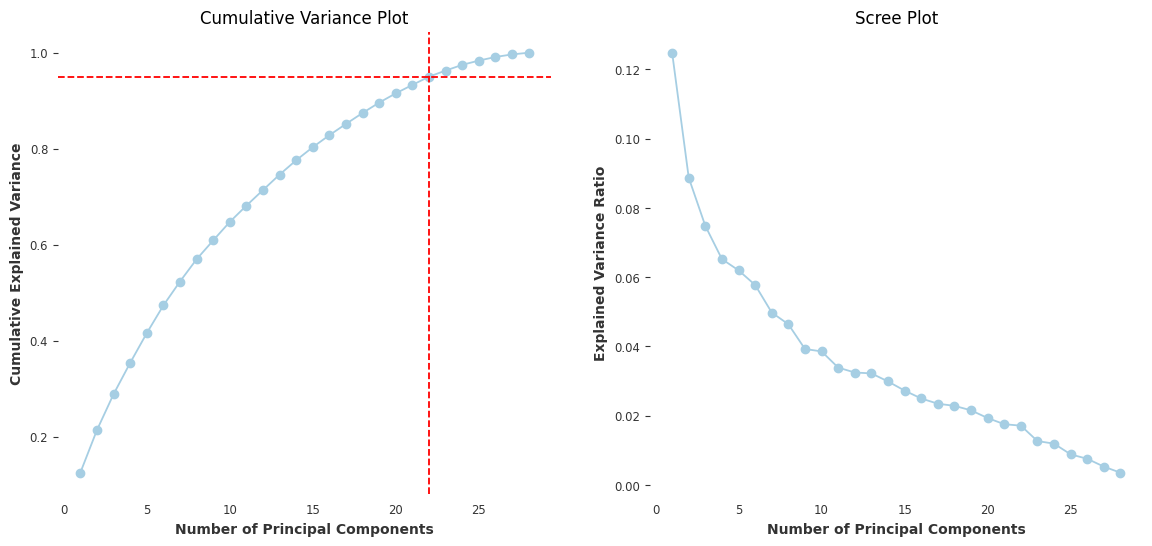

Optimal number of components: 22


In [11]:
# Create a figure with two subplots for Cumulative Variance Plot and Scree Plot
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Cumulative Variance Plot
axes[0].plot(range(1, len(explained_variance_ratio) + 1), cumulative_variance, marker='o', linestyle='-')
axes[0].set_xlabel("Number of Principal Components")
axes[0].set_ylabel("Cumulative Explained Variance")
axes[0].set_title("Cumulative Variance Plot")

axes[0].axvline(x=22, color='r', linestyle='dashed')
axes[0].axhline(y=0.95, color='r', linestyle='dashed')
axes[0].grid()
# Scree Plot (Explained Variance for Each Principal Component)
axes[1].plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o', linestyle='-', label="Explained Variance per Component")
axes[1].set_xlabel("Number of Principal Components")
axes[1].set_ylabel("Explained Variance Ratio")
axes[1].set_title("Scree Plot")
axes[1].grid()

# Show the combined plots
plt.show()

# Print the optimal number of components
print(f"Optimal number of components: {n_components}")

In [55]:
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import MinMaxScaler

scale_cols=list(X_pca.columns)
X_scaled=credit_data.copy()
scaler=MinMaxScaler()
X_scaled[scale_cols]=scaler.fit_transform(X_pca)
X_scaled.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,Hour
0,0.0,0.935192,0.766490,0.881365,0.313023,0.763439,0.267669,0.266815,0.786444,0.475312,...,0.522992,0.663793,0.391253,0.585122,0.394557,0.418976,0.312697,149.62,0,0.0
1,0.0,0.978542,0.770067,0.840298,0.271796,0.766120,0.262192,0.264875,0.786298,0.453981,...,0.480237,0.666938,0.336440,0.587290,0.446013,0.416345,0.313423,2.69,0,0.0
2,1.0,0.935217,0.753118,0.868141,0.268766,0.762329,0.281122,0.270177,0.788042,0.410603,...,0.546030,0.678939,0.289354,0.559515,0.402727,0.415489,0.311911,378.66,0,0.0
3,1.0,0.941878,0.765304,0.868484,0.213661,0.765647,0.275559,0.266803,0.789434,0.414999,...,0.510277,0.662607,0.223826,0.614245,0.389197,0.417669,0.314371,123.50,0,0.0
4,2.0,0.938617,0.776520,0.864251,0.269796,0.762975,0.263984,0.268968,0.782484,0.490950,...,0.547271,0.663392,0.401270,0.566343,0.507497,0.420561,0.317490,69.99,0,0.0


In [56]:
# Alternate Feature Selection Mothod: Apply variance threshold
selector = VarianceThreshold(threshold=0.0005)
X_selected = selector.fit_transform(X_scaled[scale_cols])
print(X_selected)


[[0.93519234 0.8813649  0.31302266 ... 0.39125268 0.58512179 0.39455679]
 [0.97854195 0.84029849 0.27179649 ... 0.33644    0.58729025 0.44601297]
 [0.93521702 0.86814082 0.26876551 ... 0.28935386 0.5595152  0.40272718]
 ...
 [0.99090481 0.781102   0.22720215 ... 0.46849189 0.59282352 0.41117652]
 [0.954209   0.84958713 0.28250841 ... 0.398836   0.54595824 0.51474558]
 [0.94923176 0.84960146 0.22948762 ... 0.38341959 0.55131946 0.29178597]]


In [57]:
sel_features=selector.get_feature_names_out()
print(sel_features)

['V1' 'V3' 'V4' 'V9' 'V10' 'V11' 'V12' 'V13' 'V14' 'V15' 'V16' 'V17' 'V18'
 'V19' 'V22' 'V24' 'V25' 'V26']


In [58]:
print(len(sel_features))

18


In [165]:
drop_cols=list(set(scale_cols).difference(set(sel_features)))
X_sel=X_scaled.drop(drop_cols,axis=1)
X_sel.drop('Time',axis=1,inplace=True)
X_sel.head()

,V1,V3,V4,V9,V10,V11,V12,V13,V14,V15,...,V17,V18,V19,V22,V24,V25,V26,Amount,Class,Hour
0,0.935192,0.881365,0.313023,0.475312,0.510600,0.252484,0.680908,0.371591,0.635591,0.446084,...,0.737173,0.655066,0.594863,0.522992,0.391253,0.585122,0.394557,149.62,0,0.0
1,0.978542,0.840298,0.271796,0.453981,0.505267,0.381188,0.744342,0.486190,0.641219,0.383840,...,0.727794,0.640681,0.551930,0.480237,0.336440,0.587290,0.446013,2.69,0,0.0
2,0.935217,0.868141,0.268766,0.410603,0.513018,0.322422,0.706683,0.503854,0.640473,0.511697,...,0.763381,0.644945,0.386683,0.546030,0.289354,0.559515,0.402727,378.66,0,0.0
3,0.941878,0.868484,0.213661,0.414999,0.507585,0.271817,0.710910,0.487635,0.636372,0.289124,...,0.711253,0.788492,0.467058,0.510277,0.223826,0.614245,0.389197,123.50,0,0.0
4,0.938617,0.864251,0.269796,0.490950,0.524303,0.236355,0.724477,0.552509,0.608406,0.349419,...,0.724243,0.650665,0.626060,0.547271,0.401270,0.566343,0.507497,69.99,0,0.0


In [62]:
drop_cols=list(scale_cols[22:])
X_top_feat_in=X_scaled.drop(drop_cols,axis=1)

In [63]:
X_top_feat_in.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V16,V17,V18,V19,V20,V21,V22,Amount,Class,Hour
0,0.0,0.935192,0.766490,0.881365,0.313023,0.763439,0.267669,0.266815,0.786444,0.475312,...,0.434392,0.737173,0.655066,0.594863,0.582942,0.561184,0.522992,149.62,0,0.0
1,0.0,0.978542,0.770067,0.840298,0.271796,0.766120,0.262192,0.264875,0.786298,0.453981,...,0.464105,0.727794,0.640681,0.551930,0.579530,0.557840,0.480237,2.69,0,0.0
2,1.0,0.935217,0.753118,0.868141,0.268766,0.762329,0.281122,0.270177,0.788042,0.410603,...,0.357443,0.763381,0.644945,0.386683,0.585855,0.565477,0.546030,378.66,0,0.0
3,1.0,0.941878,0.765304,0.868484,0.213661,0.765647,0.275559,0.266803,0.789434,0.414999,...,0.415653,0.711253,0.788492,0.467058,0.578050,0.559734,0.510277,123.50,0,0.0
4,2.0,0.938617,0.776520,0.864251,0.269796,0.762975,0.263984,0.268968,0.782484,0.490950,...,0.434995,0.724243,0.650665,0.626060,0.584615,0.561327,0.547271,69.99,0,0.0


In [64]:
X_top_feat=X_top_feat_in.drop('Time',axis=1)

In [65]:
from sklearn.preprocessing import StandardScaler, RobustScaler

# RobustScaler is less prone to outliers.

std_scaler = StandardScaler()
rob_scaler = RobustScaler()

X_top_feat['scaled_amount'] = rob_scaler.fit_transform(X_top_feat['Amount'].values.reshape(-1,1))
X_top_feat['scaled_hour'] = rob_scaler.fit_transform(X_top_feat['Hour'].values.reshape(-1,1))
X_top_feat.drop(['Hour','Amount'], axis=1, inplace=True)

In [66]:
X_top_feat.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V16,V17,V18,V19,V20,V21,V22,Class,scaled_amount,scaled_hour
count,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,...,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000
mean,0.958294,0.767258,0.837414,0.251930,0.765716,0.263020,0.265356,0.785385,0.462780,0.508722,...,0.449352,0.731130,0.653292,0.563315,0.580265,0.561480,0.510031,0.001727,0.927124,-0.105948
std,0.033276,0.017424,0.026275,0.062764,0.009292,0.013395,0.007537,0.012812,0.037846,0.022528,...,0.027866,0.024678,0.057647,0.063570,0.008208,0.011841,0.033854,0.041527,3.495006,0.648428
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.307413,-1.666667
25%,0.942658,0.760943,0.821985,0.214311,0.761060,0.255295,0.261980,0.783148,0.440626,0.497644,...,0.434468,0.717074,0.618983,0.527682,0.578011,0.557798,0.484730,0.000000,-0.229162,-0.555556
50%,0.958601,0.767949,0.840530,0.251050,0.765351,0.260263,0.265600,0.785625,0.461008,0.506800,...,0.451464,0.729221,0.653042,0.563606,0.579600,0.561005,0.510347,0.000000,0.000000,0.000000
75%,0.980645,0.775739,0.855213,0.284882,0.769836,0.267027,0.268831,0.788897,0.483350,0.518113,...,0.465994,0.742743,0.687736,0.599155,0.581682,0.564484,0.534688,0.000000,0.770838,0.444444
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,358.683155,0.888889


In [67]:
X=X_top_feat.drop('Class', axis=1)
y=X_top_feat['Class']

## Machine Learning

### Initial Method: Undersample + Gradient Boosting

In [73]:
df = X_top_feat.sample(frac=1)

# amount of fraud classes 492 rows.
fraud_df = df.loc[df['Class'] == 1]
non_fraud_df = df.loc[df['Class'] == 0][:492]

normal_distributed_df = pd.concat([fraud_df, non_fraud_df])

# Shuffle dataframe rows
new_df = normal_distributed_df.sample(frac=1, random_state=42)

new_df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V16,V17,V18,V19,V20,V21,V22,Class,scaled_amount,scaled_hour
207053,0.990914,0.759845,0.830267,0.249784,0.763536,0.271500,0.259280,0.788746,0.500711,0.510913,...,0.483358,0.696322,0.702034,0.581774,0.580190,0.562378,0.518806,0,0.361210,-0.222222
226877,0.849170,0.784758,0.735757,0.342896,0.761571,0.229115,0.234672,0.813738,0.384423,0.362876,...,0.327248,0.584222,0.560822,0.653001,0.572668,0.571816,0.498057,1,-0.307413,0.111111
177000,0.989628,0.763694,0.814404,0.266450,0.766795,0.258820,0.266712,0.783883,0.478526,0.508430,...,0.440928,0.716507,0.638496,0.602301,0.580132,0.559268,0.489406,0,0.940124,-0.555556
151196,0.972599,0.763402,0.794715,0.465636,0.770937,0.256839,0.273690,0.779740,0.458599,0.501323,...,0.499399,0.795130,0.708346,0.399043,0.590326,0.559696,0.451355,1,7.678055,-1.444444
262826,0.951204,0.816851,0.707072,0.592018,0.767472,0.236410,0.247966,0.795670,0.304713,0.382087,...,0.352648,0.643702,0.642290,0.624858,0.589124,0.571510,0.489612,1,-0.296653,0.555556


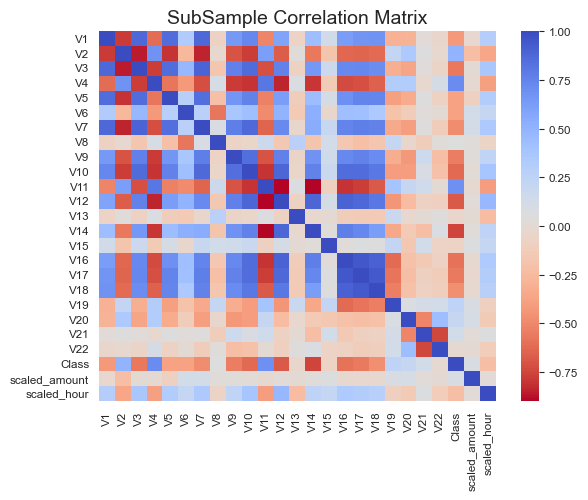

In [74]:
sub_sample_corr = new_df.corr()
ax2=sns.heatmap(sub_sample_corr, cmap='coolwarm_r', annot_kws={'size':20})
ax2.set_title('SubSample Correlation Matrix', fontsize=14)
plt.show()

In [129]:
new_df['Class'].value_counts()

Class
0    492
1    492
Name: count, dtype: int64

In [130]:
X=new_df.drop('Class',axis=1)
y=new_df['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [131]:
from imblearn.pipeline import make_pipeline
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import RepeatedStratifiedKFold
#for classification tasks
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, RandomForestRegressor
from xgboost import XGBClassifier
#metrics
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.model_selection import StratifiedKFold
# ignore warnings   
import warnings
warnings.filterwarnings('ignore')
# Example pipelines for different models

pipelines = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(),
    'Gradient Boosting': GradientBoostingClassifier()
}


cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)


In [78]:
from sklearn.model_selection import cross_val_score
import numpy as np

results = {}
for name, pipeline in pipelines.items():
    scores = cross_val_score(pipeline, X_train, y_train, scoring='f1', cv=cv, n_jobs=-1)
    results[name] = {
        'Mean F1': np.mean(scores)
    }

# Compare results
for model, metrics in results.items():
    print(f"{model}: {metrics['Mean F1']:.3f}")


Logistic Regression: 0.908
Random Forest: 0.939
SVM: 0.885
Gradient Boosting: 0.943


In [132]:
gb_mdl=GradientBoostingClassifier(n_estimators=200,learning_rate=0.05,
                                 random_state=100, max_features=5)
gb_mdl.fit(X_train,y_train)
y_pred=gb_mdl.predict(X_test)



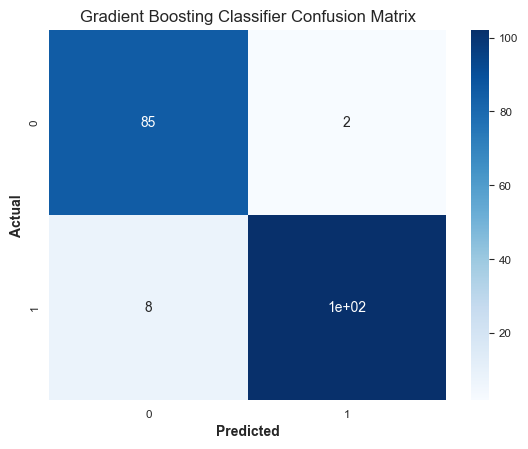

In [133]:

RF_cf = confusion_matrix(y_test, y_pred)
sns.set_style("white")
sns.heatmap(RF_cf,annot=True,cmap = 'Blues')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Gradient Boosting Classifier Confusion Matrix')
plt.show()

In [137]:
from sklearn.metrics import classification_report

print("Classification Report:\n")
print(classification_report(y_test,y_pred))

Classification Report:

              precision    recall  f1-score   support

           0       0.91      0.98      0.94        87
           1       0.98      0.93      0.95       110

    accuracy                           0.95       197
   macro avg       0.95      0.95      0.95       197
weighted avg       0.95      0.95      0.95       197



The Gradient boosting classifier has good performance and high recall, but the undersampling removes significant data of non-fraud class

### Method 2: Oversample + XGBoost

In [166]:
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
from xgboost import XGBClassifier

from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE

from sklearn.metrics import make_scorer, average_precision_score, recall_score, f1_score

In [167]:
scoring = {
    'AUPRC': make_scorer(average_precision_score, needs_proba=True),
    'F1': make_scorer(f1_score),
    'Recall': make_scorer(recall_score)
}

In [168]:
from sklearn.feature_selection import RFECV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold

In [169]:
# 1. Feature selection using RFECV with recall scoring
rfecv = RFECV(
    estimator=RandomForestClassifier(n_estimators=100, random_state=42),
    step=5,
    cv=StratifiedKFold(5),
    scoring='recall',
    n_jobs=-1,
    min_features_to_select=8 # parallelize if possible
)

In [170]:
# 2. XGBoost model (no scale_pos_weight needed due to SMOTE)
xgb_model = XGBClassifier(
    use_label_encoder=False,
    eval_metric='aucpr',
    random_state=42
)

In [171]:
# 3. Full pipeline
pipeline = Pipeline(steps=[
    ('feature_selection', rfecv ),
    ('smote', SMOTE(sampling_strategy=0.3, random_state=42)),
    ('classifier', xgb_model)
])


In [172]:
X=X_sel.drop('Class', axis=1)
y=X_sel['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [173]:
#metrics
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
from sklearn.model_selection import StratifiedKFold
# ignore warnings   
import warnings
warnings.filterwarnings('ignore')
accuracy_lst = []
precision_lst = []
recall_lst = []
f1_lst = []
auc_lst = []
sf = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)  # Enable shuffling
for train, val in sf.split(X_train, y_train):
    model = pipeline.fit(X_train.iloc[train], y_train.iloc[train])
    prediction = pipeline.predict(X_train.iloc[val])
    accuracy_lst.append(accuracy_score(y_train.iloc[val], prediction))
    precision_lst.append(precision_score(y_train.iloc[val], prediction))
    recall_lst.append(recall_score(y_train.iloc[val], prediction))
    f1_lst.append(f1_score(y_train.iloc[val], prediction))
    auc_lst.append(roc_auc_score(y_train.iloc[val], prediction))
print("accuracy: ", np.mean(accuracy_lst))
print("precision:",np.mean(precision_lst))
print("recall: ",np.mean(recall_lst))
print("f1: ",np.mean(f1_lst))
print('AUC: ',np.mean(auc_lst))

accuracy:  0.9985428690557177
precision: 0.560672036108824
recall:  0.8147354754949692
f1:  0.6625327377968917
AUC:  0.9067983845512059


In [174]:
gb_model=pipeline.fit(X_train,y_train)

In [175]:
y_pred=gb_model.predict(X_test)

Classification Report: 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56786
           1       0.84      0.47      0.60       176

    accuracy                           1.00     56962
   macro avg       0.92      0.73      0.80     56962
weighted avg       1.00      1.00      1.00     56962



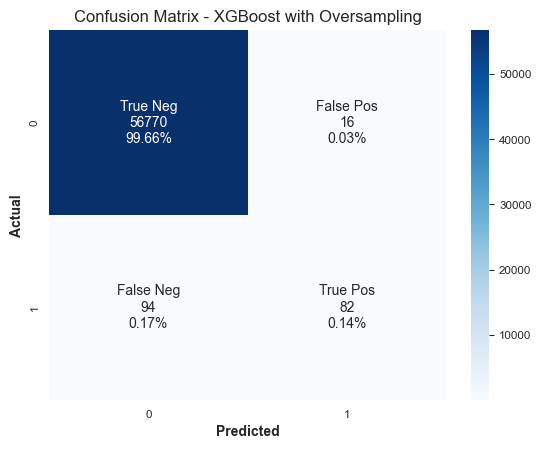

In [176]:
from sklearn.metrics import PrecisionRecallDisplay, classification_report, confusion_matrix

def plot_report_model_performance(model_name, y_testing, preds):
    print("Classification Report: \n")
    print(classification_report(y_testing, preds))
        
    cm = confusion_matrix(y_testing, preds)
    names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
    counts = [value for value in cm.flatten()]
    percentages = ['{0:.2%}'.format(value) for value in cm.flatten()/np.sum(cm)]
    labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(names, counts, percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cm,annot = labels,cmap = 'Blues',fmt ='')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()
    # display = PrecisionRecallDisplay.from_predictions(y_testing, preds, name=f"{model_name}")
    # _ = display.ax_.set_title("2-class Precision-Recall curve")
    # plt.show(display)
    
plot_report_model_performance('XGBoost with Oversampling', y_pred, y_test)

### Method 3: Oversample+Random Forest

In [180]:
X=X_top_feat.drop('Class', axis=1)
y=X_top_feat['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [181]:
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.pipeline import Pipeline

RF_mdl=RandomForestClassifier()
sampler = SMOTE(random_state=0)
RF_smote = Pipeline([('sampler', sampler), ('classifier', RF_mdl)])
#using for loop to conduct SMOTE in each fold of cross-validation
# Cross-validation
accuracy_lst = []
precision_lst = []
recall_lst = []
f1_lst = []
auc_lst = []
sf = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)  # Enable shuffling
for train, val in sf.split(X_train, y_train):
    model = RF_smote.fit(X_train.iloc[train], y_train.iloc[train])
    prediction = model.predict(X_train.iloc[val])
    accuracy_lst.append(accuracy_score(y_train.iloc[val], prediction))
    precision_lst.append(precision_score(y_train.iloc[val], prediction))
    recall_lst.append(recall_score(y_train.iloc[val], prediction))
    f1_lst.append(f1_score(y_train.iloc[val], prediction))
    auc_lst.append(roc_auc_score(y_train.iloc[val], prediction))
print("accuracy: ", np.mean(accuracy_lst))
print("precision:",np.mean(precision_lst))
print("recall: ",np.mean(recall_lst))
print("f1: ",np.mean(f1_lst))
print('AUC: ',np.mean(auc_lst))

accuracy:  0.9994777151133446
precision: 0.8764009398858906
recall:  0.8147679324894515
f1:  0.8440107516492807
AUC:  0.907282845505792


In [182]:
# Final model & test prediction
RF_smote.fit(X_train, y_train)  # Train on FULL training data
y_pred = RF_smote.predict(X_test)

In [183]:
print("\nTest Set Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.3f}")
print(f"F1-Score: {f1_score(y_test, y_pred):.3f}")
print(f"Precision: {precision_score(y_test,y_pred):.3f}")
print(f"Recall: {recall_score(y_test,y_pred):.3f}")


Test Set Performance:
Accuracy: 1.000
F1-Score: 0.866
Precision: 0.875
Recall: 0.857


Classification Report: 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.86      0.88      0.87        96

    accuracy                           1.00     56962
   macro avg       0.93      0.94      0.93     56962
weighted avg       1.00      1.00      1.00     56962



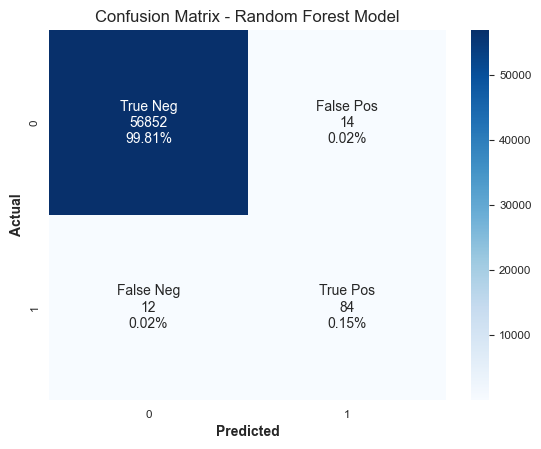

In [184]:
from sklearn.metrics import PrecisionRecallDisplay
def plot_report_model_performance(model_name, y_testing, preds):
    print("Classification Report: \n")
    print(classification_report(y_testing, preds))
        
    cm = confusion_matrix(y_testing, preds)
    names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
    counts = [value for value in cm.flatten()]
    percentages = ['{0:.2%}'.format(value) for value in cm.flatten()/np.sum(cm)]
    labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(names, counts, percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cm,annot = labels,cmap = 'Blues',fmt ='')
    plt.title('Confusion Matrix - Random Forest Model')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()
    # display = PrecisionRecallDisplay.from_predictions(y_testing, preds, name=f"{model_name}")
    # _ = display.ax_.set_title("2-class Precision-Recall curve")
    # plt.show(display)
    
plot_report_model_performance('Random Forest with Oversampling', y_pred, y_test)

In [185]:
from sklearn.metrics import precision_recall_curve, auc
y_scores = model.predict_proba(X_test)[:, 1]
precision, recall, thresholds = precision_recall_curve(y_test, y_scores)
auc_score = auc(recall, precision)

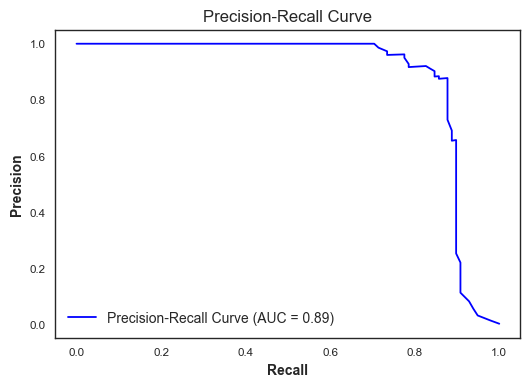

In [186]:
# Plot precision-recall curve
fig, ax = plt.subplots(figsize=(6,4))
# plt.figure(figsize=(8, 6))
ax.plot(recall, precision, color='blue', label=f'Precision-Recall Curve (AUC = {auc_score:.2f})')
#baseline = len(y_test[y_test==1]) / len(y_test)
#ax.plot([0, 1], [baseline, baseline], linestyle='--', label='Baseline')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

In [187]:
from sklearn.metrics import auc, average_precision_score

print(f'RF AUC-PR: {round(auc(recall, precision),2)}')


RF AUC-PR: 0.89


#### Feature Importance

In [188]:
RF_smote.steps

[('sampler', SMOTE(random_state=0)), ('classifier', RandomForestClassifier())]

In [189]:
# Built-in feature importance (Gini Importance)
importances = RF_smote.steps[1][1].feature_importances_
feature_names=list(X_test.columns)
feature_imp_df = pd.DataFrame({'Feature': feature_names, 'Gini Importance': importances}).sort_values('Gini Importance', ascending=True) 
print(feature_imp_df)

          Feature  Gini Importance
21            V22         0.004918
12            V13         0.005152
19            V20         0.006772
14            V15         0.007405
20            V21         0.009924
18            V19         0.010070
0              V1         0.010459
23    scaled_hour         0.011782
5              V6         0.014097
17            V18         0.014225
7              V8         0.014641
4              V5         0.015289
22  scaled_amount         0.018087
6              V7         0.020187
8              V9         0.029378
15            V16         0.032234
1              V2         0.035643
2              V3         0.049155
10            V11         0.051164
9             V10         0.091055
11            V12         0.105614
16            V17         0.118749
3              V4         0.145307
13            V14         0.178694


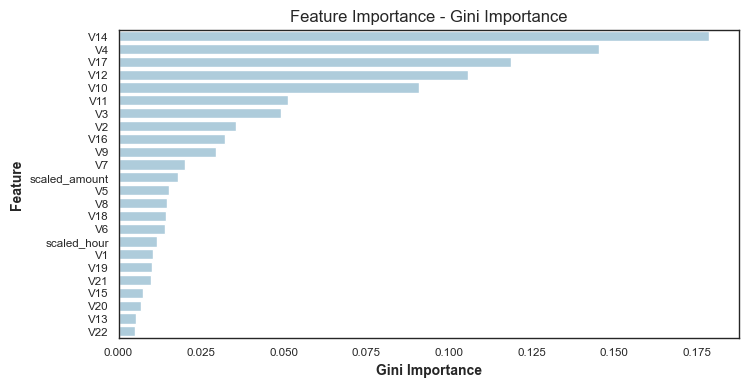

In [190]:
# Create a bar plot for feature importance
plt.figure(figsize=(8, 4))
sns.barplot(feature_imp_df, x='Gini Importance', y='Feature')
plt.xlabel('Gini Importance')
plt.title('Feature Importance - Gini Importance')
plt.gca().invert_yaxis()  # Invert y-axis for better visualization
plt.show()

In [191]:
pred_out=X_test.copy()
pred_out['prediction']=y_pred
pred_out.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V16,V17,V18,V19,V20,V21,V22,scaled_amount,scaled_hour,prediction
43428,0.677529,0.857843,0.514238,0.673305,0.672857,0.234543,0.163607,0.866023,0.169727,0.216788,...,0.134540,0.172200,0.075668,0.805534,0.564135,0.580675,0.457425,4.781527,-0.444444,1
49906,0.964067,0.738308,0.835090,0.190502,0.755945,0.273234,0.262161,0.787789,0.493775,0.497032,...,0.381204,0.734819,0.773834,0.597093,0.585653,0.558039,0.466062,6.960386,-0.333333,0
29474,0.982071,0.761026,0.840336,0.206273,0.762082,0.263426,0.261014,0.785410,0.429305,0.524380,...,0.505636,0.715638,0.616613,0.656419,0.582532,0.563130,0.517881,0.125760,-0.666667,0
276481,0.950953,0.784646,0.808486,0.236437,0.771006,0.256679,0.267043,0.791672,0.446082,0.480240,...,0.465188,0.745722,0.720786,0.571223,0.577661,0.567266,0.550787,-0.286453,0.777778,0
278846,0.992512,0.765809,0.819811,0.266438,0.764490,0.253402,0.265619,0.783661,0.475293,0.514090,...,0.452248,0.717419,0.630333,0.594919,0.577547,0.557632,0.481276,-0.294977,0.777778,0


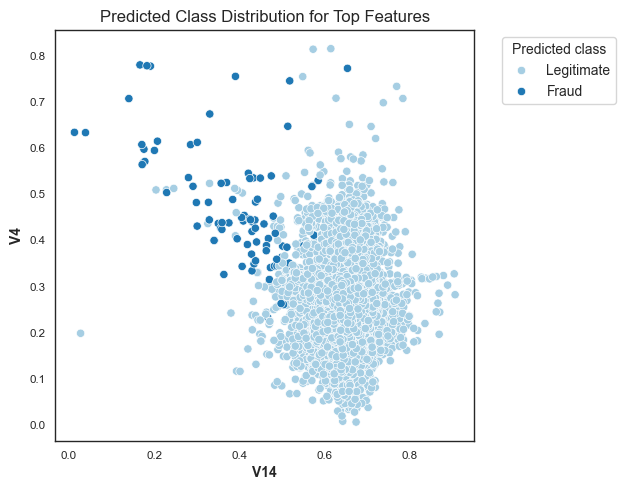

In [205]:
ax=sns.scatterplot(pred_out, x='V14',y='V4', hue='prediction')

legend = ax.legend(frameon=True, edgecolor='black', facecolor='white', framealpha=0.8)
legend.set_title("Predicted class")
new_labels = ['Legitimate', 'Fraud']
for text, label in zip(legend.get_texts(), new_labels):
    text.set_text(label)
# Move the legend outside the plot
sns.move_legend(ax, "upper left", bbox_to_anchor=(1.05, 1))

plt.tight_layout()
plt.title('Predicted Class Distribution for Top Features')
plt.show()


This model is chosen as the final model as it achieves good performance and recall.